In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*

This script recreates the dotted lines from figure 1 b from Hastrup et. al. by using Parameters provided by their formula.

## Note: in Hastrup, they use X = 1/sqrt(2)(a+a.dag)

## 1. Definition of squeezing procedure

In [2]:
def squeezing(psi, L, repetitions):
    psis = [psi]
    for k in range(repetitions):
        k = k+1 # starting to count from 1
        if k == 1:
            u_k = 2**(repetitions-1)*np.sqrt(2)*L
        else:
            u_k = -2**(repetitions-k)*np.sqrt(2)*L 
        
        if k == repetitions:
            v_k = -np.pi/(4*np.sqrt(2)*L)
        else:
            v_k = 2.0**(-(repetitions-k))*np.pi/(4*np.sqrt(2)*L) 
            
        print(u_k,v_k)
        psi_new = V_ideal_operator(v_k)*U_ideal_operator(u_k)*psis[-1]
        psis.append(psi_new)
    return psis

def xp_cut(state, xvec):
    W = qt.wigner(qt.ptrace(state,1),xvec,xvec)
    p_cut = W[:,int(len(xvec)/2)]
    x_cut = W[int(len(xvec)/2),:]
    return p_cut, x_cut 
    
        

## Parameters and Wigners

In [15]:
L = 0.45
repetitions = 1

psis = squeezing(vac,L, repetitions)

0.6363961030678928 -1.2341341494884348


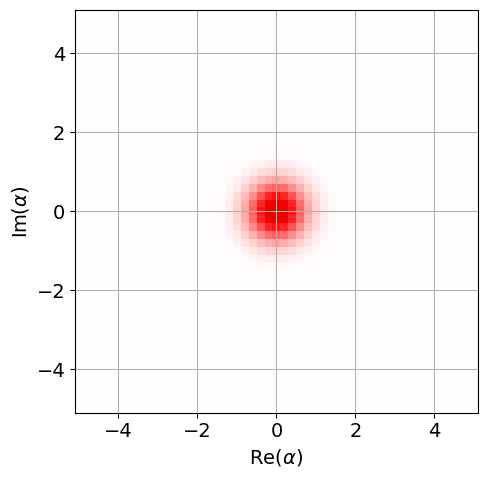

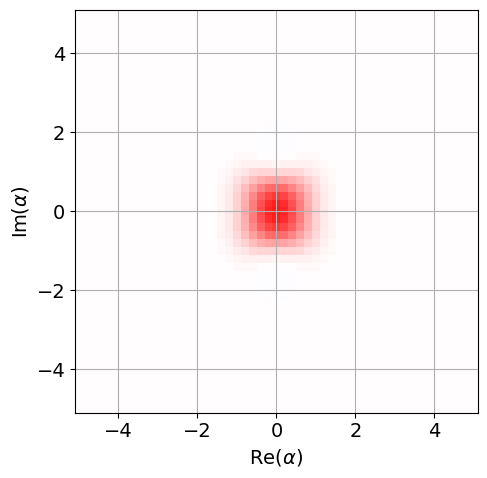

In [18]:
plot_wigner(psis[0], max_alpha=5)
plot_wigner(psis[1], max_alpha=5)
# plot_wigner(psis[2], max_alpha=5)
# plot_wigner(psis[3], max_alpha=5)

In [6]:
xvec = np.linspace(-5,5,100)

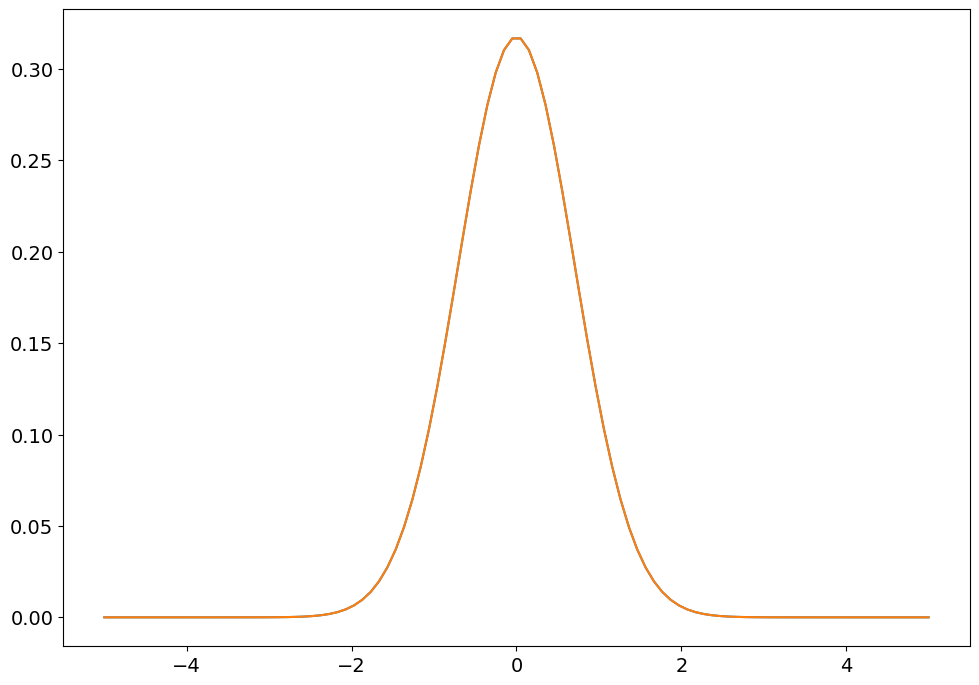

In [8]:
p, x = xp_cut(psis[0], xvec)
plt.plot(xvec,p)
plt.plot(xvec,x)


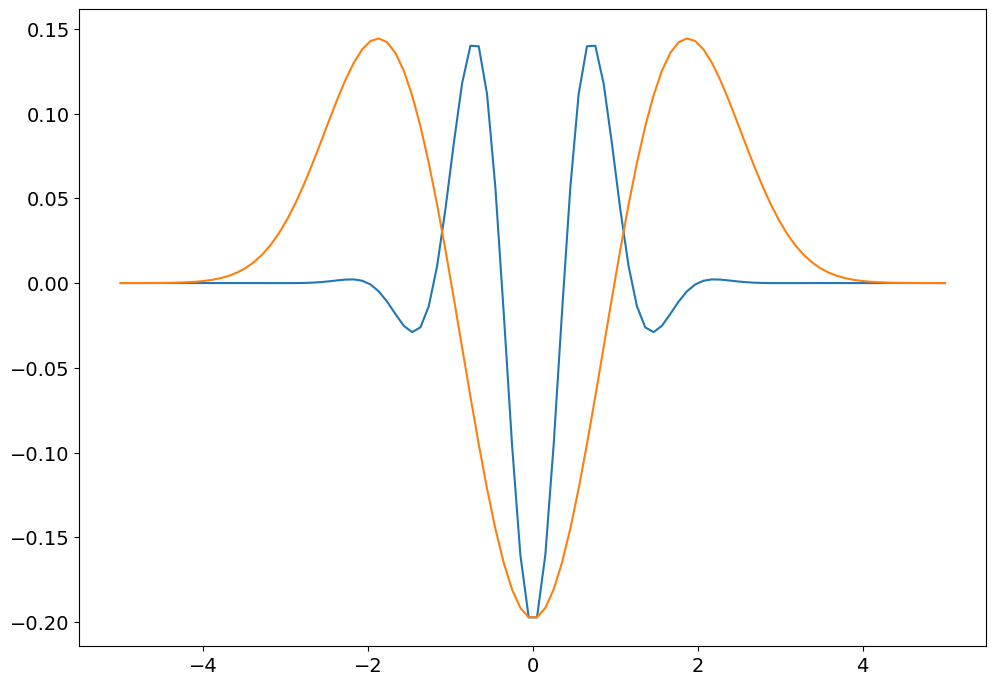

In [10]:
p, x = xp_cut(psis[1], xvec)
plt.plot(xvec,p)
plt.plot(xvec,x)


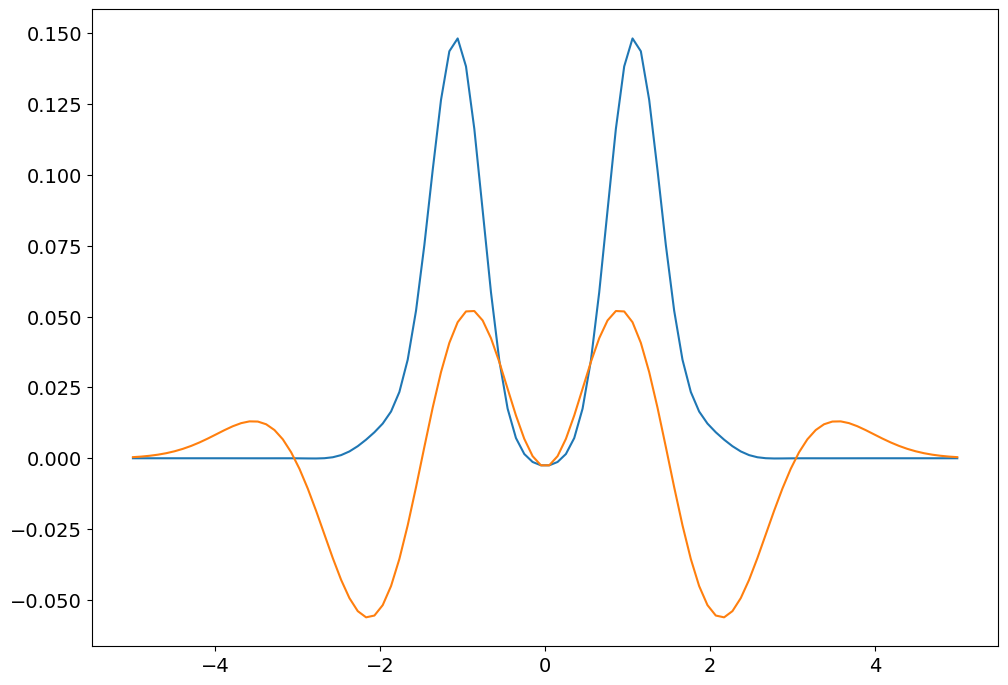

In [11]:
p, x = xp_cut(psis[2], xvec)
plt.plot(xvec,p)
plt.plot(xvec,x)

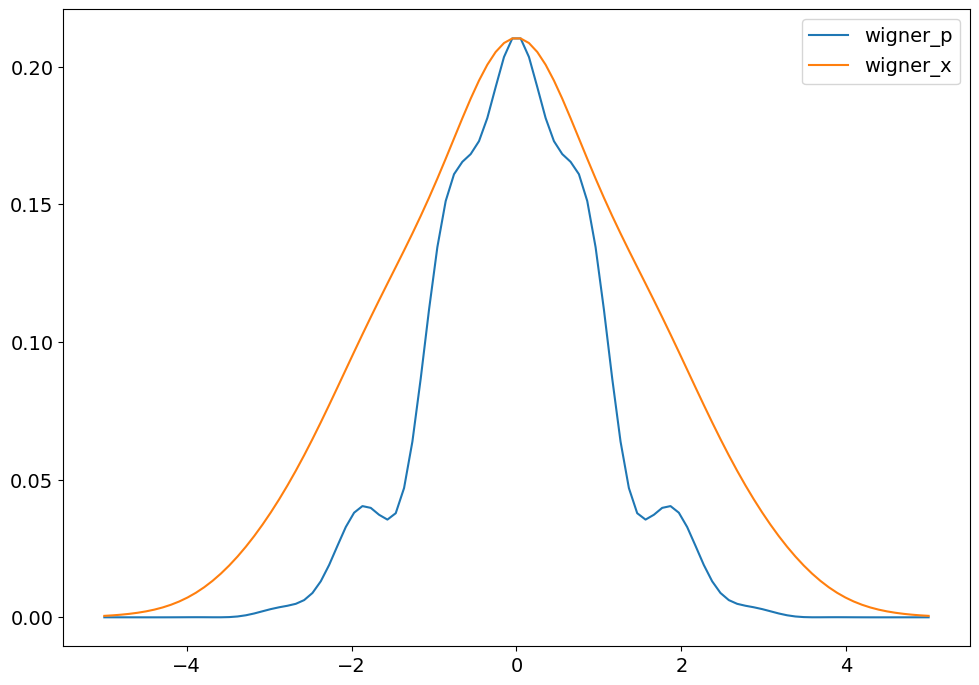

In [12]:
p, x = xp_cut(psis[3], xvec)
plt.plot(xvec,p, label = "wigner_p" )
plt.plot(xvec,x, label = "wigner_x" )
plt.legend()

## 3. Integrate Wigner to find Pr(x) and Pr(y)

In [13]:
from scipy.integrate import quad
xvec = np.linspace(0, 5, 80)
# quad integrates over the first argument of the passed function.
def integrandx(x, y):
    return qt.wigner(qt.ptrace(psi,1), x, y)
def integrandy(y, x):
    return qt.wigner(qt.ptrace(psi,1), x, y)

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

KeyboardInterrupt: 

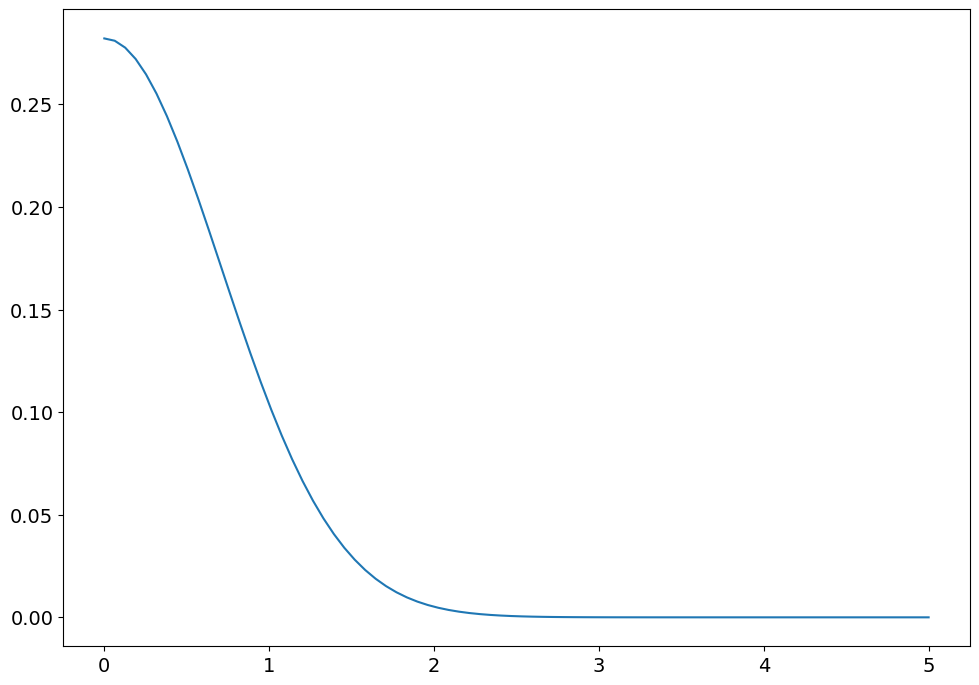

In [14]:
psi = psis[0]

prx0 = []
for x in xvec:
    prx0.append(quad(integrandy, 0, 3, args=(x))[0])
    print(x, "done")

plt.plot(xvec, prx0 )


pry0 = []
for y in xvec:
    pry0.append(quad(integrandx, 0, 3, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry0 )

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

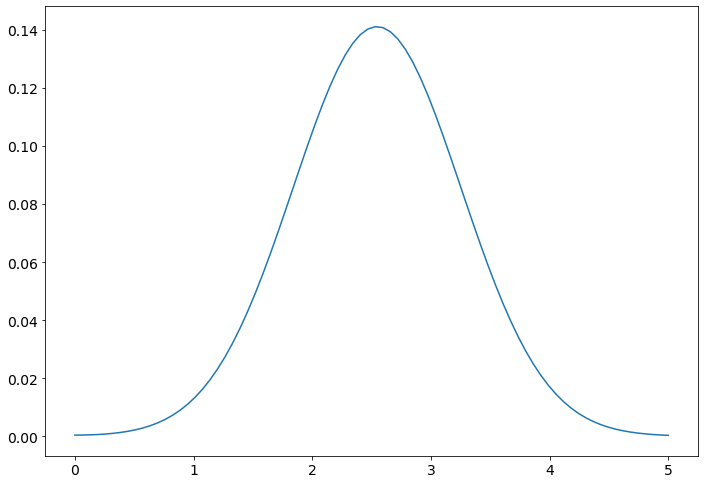

In [59]:
psi = psis[1]

prx1 = []
for x in xvec:
    prx1.append(quad(integrandy, 0, 6, args=(x))[0])
    print(x, "done")
plt.plot(xvec, prx1 )


0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

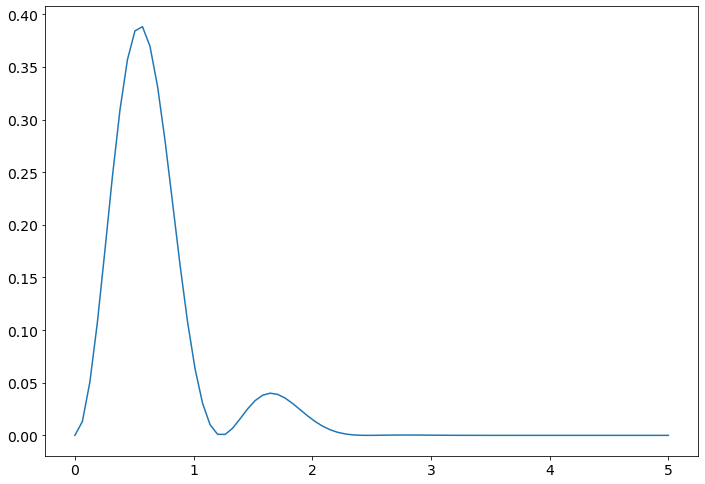

In [60]:
pry1 = []
for y in xvec:
    pry1.append(quad(integrandx, 0, 6, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry1 )

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

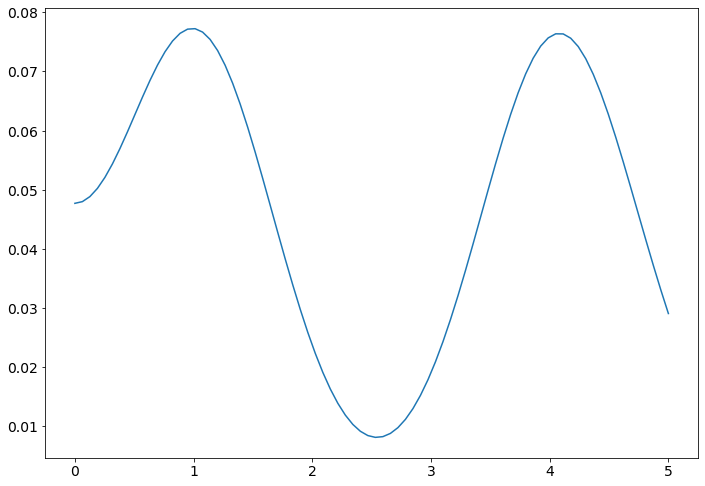

In [61]:
psi = psis[2]

prx1 = []
for x in xvec:
    prx1.append(quad(integrandy, 0, 6, args=(x))[0])
    print(x, "done")
plt.plot(xvec, prx1 )

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

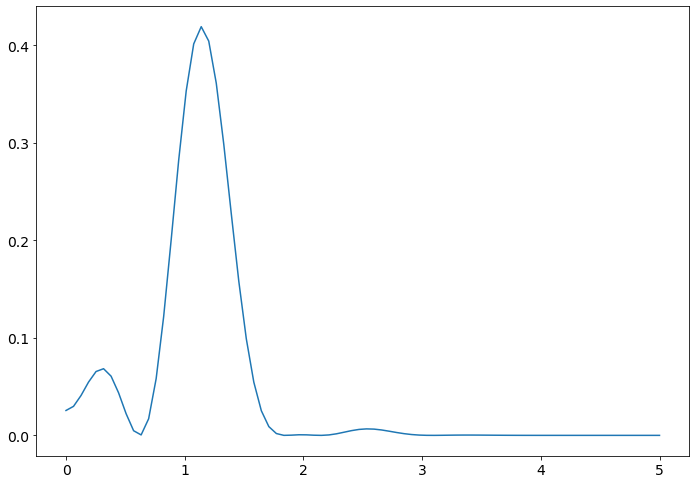

In [62]:
pry1 = []
for y in xvec:
    pry1.append(quad(integrandx, 0, 6, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry1 )

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

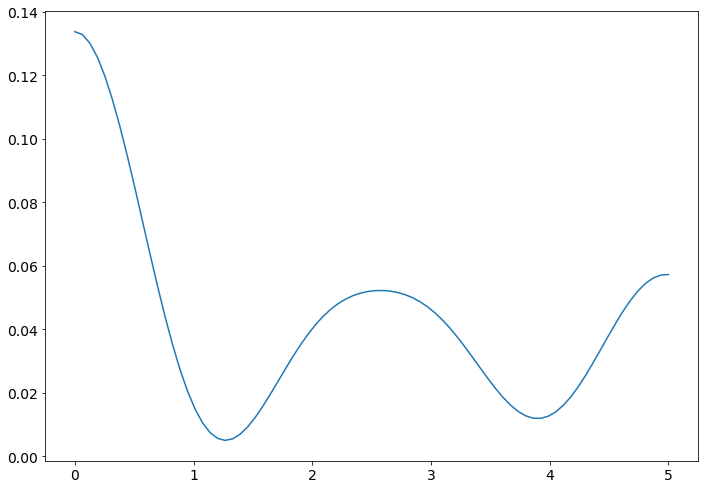

In [63]:
psi = psis[3]

prx1 = []
for x in xvec:
    prx1.append(quad(integrandy, 0, 6, args=(x))[0])
    print(x, "done")
plt.plot(xvec, prx1 )

0.0 done
0.06329113924050633 done
0.12658227848101267 done
0.189873417721519 done
0.25316455696202533 done
0.31645569620253167 done
0.379746835443038 done
0.44303797468354433 done
0.5063291139240507 done
0.569620253164557 done
0.6329113924050633 done
0.6962025316455697 done
0.759493670886076 done
0.8227848101265823 done
0.8860759493670887 done
0.949367088607595 done
1.0126582278481013 done
1.0759493670886076 done
1.139240506329114 done
1.2025316455696204 done
1.2658227848101267 done
1.3291139240506329 done
1.3924050632911393 done
1.4556962025316458 done
1.518987341772152 done
1.5822784810126582 done
1.6455696202531647 done
1.708860759493671 done
1.7721518987341773 done
1.8354430379746836 done
1.89873417721519 done
1.9620253164556964 done
2.0253164556962027 done
2.088607594936709 done
2.151898734177215 done
2.2151898734177218 done
2.278481012658228 done
2.3417721518987342 done
2.405063291139241 done
2.468354430379747 done
2.5316455696202533 done
2.5949367088607596 done
2.658227848101265

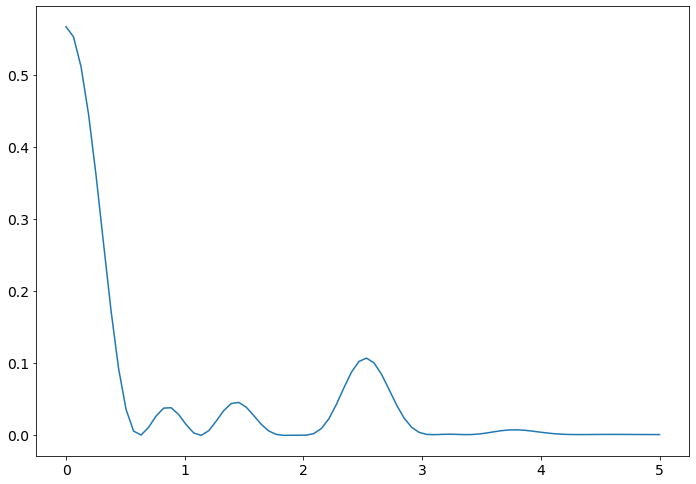

In [64]:
pry1 = []
for y in xvec:
    pry1.append(quad(integrandx, 0, 6, args=(y))[0])
    print(y, "done")

plt.plot(xvec, pry1 )

In [67]:
P = (1j*(a.dag()-a))/np.sqrt(2)
X = (a.dag()+a)/np.sqrt(2)
print("delta P^2", qt.expect(P**2,psis[3]))
print("delta X^2",qt.expect(X**2,psis[3]))

delta P^2 1.6154277792494245
delta X^2 10.558168622497565
